# Ejercicio 3: Clasificación de videojuegos por popularidad. | Bosques aleatorios (Random Forest)

## Descripción:
Clasifica videojuegos como "muy populares", "moderadamente populares" o "menos populares" basandote en ventas, calificaciones y datos de usuarios activos.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Pasos:

- Usa el dataset de Video Games Sales en Kaggle

In [2]:
df = pd.read_csv('vgchartz-2024.csv')
df

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


- Limpia los datos

In [4]:
df.isna().sum() # Vamos a quitar los valores faltantes
df = df.dropna(subset=["total_sales"])
df = df.dropna(subset=["critic_score"])
df

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,/games/boxart/full_8694581AmericaFrontccc.jpg,Dark Messiah Might and Magic,PC,Role-Playing,Ubisoft,Arkane Studios / Floodgate Entertainment / Kuj...,7.3,0.00,NaN,NaN,0.00,0.00,2006-10-24,NaN
18907,/games/boxart/full_9054815AmericaFrontccc.jpg,Jade Empire: Special Edition,PC,Role-Playing,2K Games,BioWare Corp.,7.8,0.00,NaN,NaN,0.00,0.00,2007-02-26,NaN
18917,/games/boxart/full_9554258PALFrontccc.jpeg,Teslagrad,WiiU,Platform,Rain Games,Rain Games,7.0,0.00,NaN,NaN,0.00,0.00,2014-09-11,2018-01-04
18918,/games/boxart/full_4504623AmericaFrontccc.jpg,Open Season,XB,Platform,Ubisoft,Ubisoft Montreal,6.4,0.00,0.00,NaN,0.00,0.00,2006-09-19,NaN


- Selecciona las variables mas importantes para la clasificacion.
- Agrupa los datos de ventas por titulo.
- Promedia las calificaciones de los criticos.

In [5]:
df_reduced = df[["title", "total_sales", "critic_score"]]
df_grouped = df_reduced.groupby("title").agg(total_sales=("total_sales", "sum"), critic_score=("critic_score", "mean")).reset_index()
df_grouped

,title,total_sales,critic_score
0,.hack//G.U. Vol.2//Reminisce,0.23,6.200
1,.hack//G.U. Vol.3//Redemption,0.17,5.700
2,.hack//Infection Part 1,1.27,7.700
3,.hack//Mutation Part 2,0.68,7.500
4,.hack//Outbreak Part 3,0.46,7.100
...,...,...,...
2871,bit Generations: Dotstream,0.01,8.000
2872,de Blob 2,0.65,7.725
2873,echochrome,0.09,7.600
2874,echoshift,0.00,7.500


In [6]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876 entries, 0 to 2875
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2876 non-null   object 
 1   total_sales   2876 non-null   float64
 2   critic_score  2876 non-null   float64
dtypes: float64(2), object(1)
memory usage: 67.5+ KB


In [7]:
df_grouped.to_csv('cleaned-vgchartz-2024.csv', index=False) # Guardar el dataset limpio

- Analiza las variables mas importantes para la clasificacion.

Se mantuvieron las variables de ventas totales y calificación de críticos, esto porque son las más relevantes para determinar la popularidad de un videojuego. Se eliminaron las demás variables porque no aportan información relevante para la clasificación. Se quitaron los registros con valores faltantes en ventas totales y calificación de críticos.

- Aplica Random Forest para clasificar y analiza la importancia de las caracteristicas.

In [8]:
df = pd.read_csv('cleaned-vgchartz-2024.csv')
df

,title,total_sales,critic_score
0,.hack//G.U. Vol.2//Reminisce,0.23,6.200
1,.hack//G.U. Vol.3//Redemption,0.17,5.700
2,.hack//Infection Part 1,1.27,7.700
3,.hack//Mutation Part 2,0.68,7.500
4,.hack//Outbreak Part 3,0.46,7.100
...,...,...,...
2871,bit Generations: Dotstream,0.01,8.000
2872,de Blob 2,0.65,7.725
2873,echochrome,0.09,7.600
2874,echoshift,0.00,7.500


In [9]:
scaler = RobustScaler() # Normalizar las variables

In [10]:
df[["total_sales", "critic_score"]] = scaler.fit_transform(df[["total_sales", "critic_score"]])

Asignamos popularidad de la siguiente manera:
- Muy populares: Si el puntaje total es mayor a 0.7
- Moderadamente populares: Si el puntaje total está entre 0.4 y 0.7
- Menos populares: Si el puntaje total es menor a 0.4

In [11]:
def categorize_popularity(row):
    combined_score = (row['total_sales'] + row['critic_score']) / 2
    if combined_score > 0.7:
        return "muy populares"
    elif 0.4 <= combined_score <= 0.7:
        return "moderadamente populares"
    else:
        return "menos populares"

In [12]:
df['popularity'] = df.apply(categorize_popularity, axis=1)
df

,title,total_sales,critic_score,popularity
0,.hack//G.U. Vol.2//Reminisce,-0.113924,-0.610329,menos populares
1,.hack//G.U. Vol.3//Redemption,-0.189873,-0.892019,menos populares
2,.hack//Infection Part 1,1.202532,0.234742,muy populares
3,.hack//Mutation Part 2,0.455696,0.122066,menos populares
4,.hack//Outbreak Part 3,0.177215,-0.103286,menos populares
...,...,...,...,...
2871,bit Generations: Dotstream,-0.392405,0.403756,menos populares
2872,de Blob 2,0.417722,0.248826,menos populares
2873,echochrome,-0.291139,0.178404,menos populares
2874,echoshift,-0.405063,0.122066,menos populares


- Divide el dataset en entrenamiento y prueba

In [13]:
features = ["total_sales", "critic_score"]
X = df[features]
y = df["popularity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Modelo

In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- Presenta los resultados con graficos y presenta tu analisis.

In [15]:
y_pred = rf_model.predict(X_test)

In [16]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
                          precision    recall  f1-score   support

        menos populares       1.00      1.00      1.00       416
moderadamente populares       0.90      0.96      0.93        49
          muy populares       0.99      0.96      0.98       111

               accuracy                           0.99       576
              macro avg       0.96      0.97      0.97       576
           weighted avg       0.99      0.99      0.99       576

Confusion Matrix:
 [[415   1   0]
 [  1  47   1]
 [  0   4 107]]


In [17]:
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title("Confusion Matrix")
    plt.show()

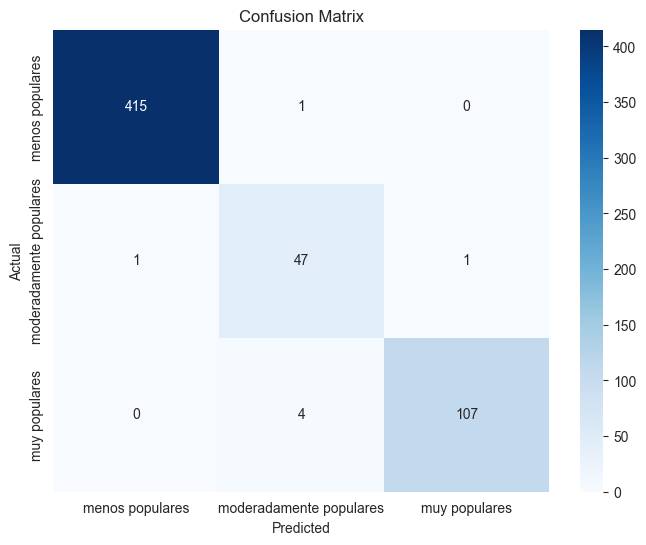

In [18]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), rf_model.classes_)

- Importancia de las caracteristicas

In [19]:
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

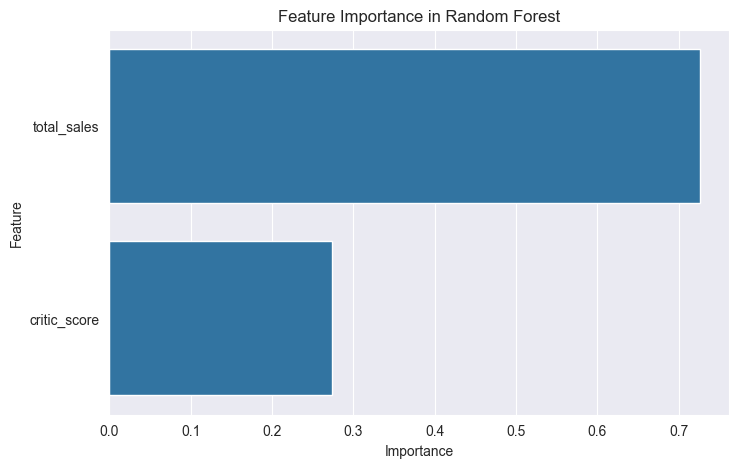

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance in Random Forest")
plt.show()

- Los videojuegos "muy populares" pueden ser identificados con mayor precisión porque tienen valores extremos bien definidos en las características.
- Las categorías "moderadamente populares" y "menos populares" pueden tener más confusión entre sí, debido a la cercanía en los valores combinados de ventas y críticas.
- Las ventas son el mayor indicador de popularidad, pero las críticas también aportan información valiosa, especialmente en la diferenciación de videojuegos con ventas moderadas.